# Feature Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)     

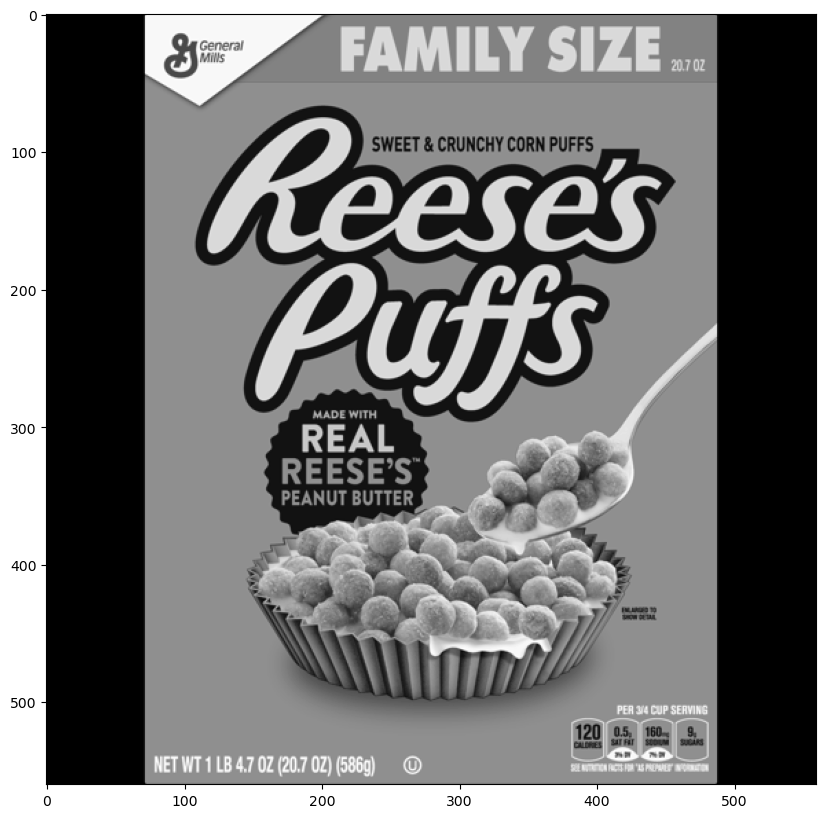

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0) 

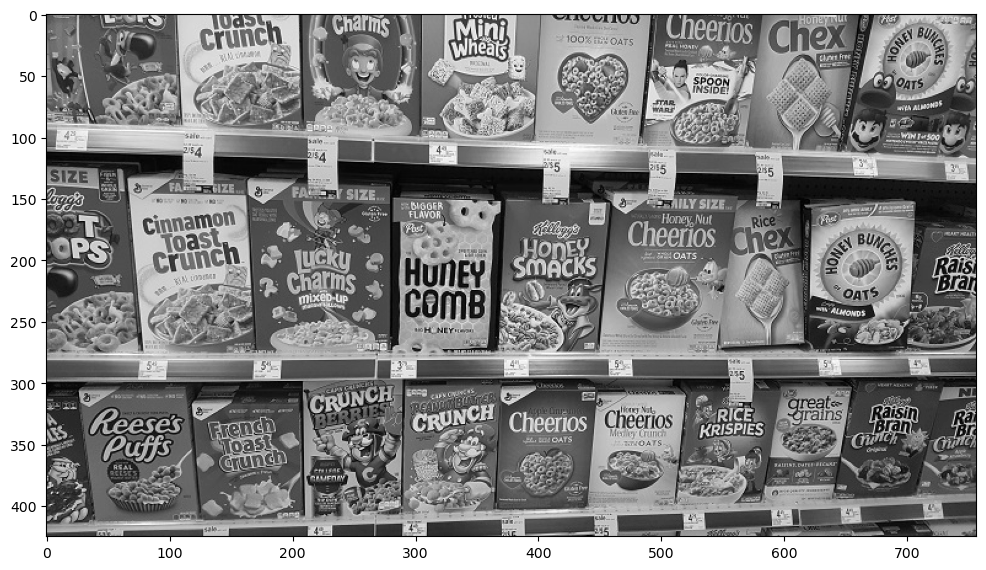

In [6]:
display(cereals)

--------
# Brute Force Detection with ORB Descriptors

In [17]:
# Khởi tạo bộ xác định ORB
orb = cv2.ORB_create()

# Tìm các điểm đặc trưng và vectơ mô tả bằng ORB cho ảnh reeses
kp1, des1 = orb.detectAndCompute(reeses, None)

# Tìm các điểm đặc trưng và vectơ mô tả bằng ORB cho ảnh cereals
kp2, des2 = orb.detectAndCompute(cereals, None)

# Tạo đối tượng BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# So khớp các vectơ mô tả.
matches = bf.match(des1, des2)

# Sắp xếp chúng theo thứ tự khoảng cách.
matches = sorted(matches, key=lambda x: x.distance)

# Vẽ 25 so khớp đầu tiên.
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

Giải thích:

- orb = cv2.ORB_create(): Đoạn này khởi tạo một đối tượng ORB detector và gán nó cho biến orb. Các tham số mặc định được sử dụng trong việc tạo ORB detector.

- kp1, des1 = orb.detectAndCompute(reeses, None): Sử dụng ORB detector đã được tạo (orb) để trích xuất các điểm đặc trưng (keypoints) và mô tả (descriptors) từ hình ảnh reeses.

 - kp1: Là một danh sách các điểm đặc trưng trên hình ảnh reeses.
 - des1: Là một mảng chứa các mô tả (vectors mô tả) tương ứng với các điểm đặc trưng.
 - kp2, des2 = orb.detectAndCompute(cereals, None): Tương tự như trên, nhưng lần này đối tượng ORB detector được sử dụng để trích xuất các điểm đặc trưng và mô tả từ hình ảnh cereals.

 - kp2: Là danh sách các điểm đặc trưng trên hình ảnh cereals.
 - des2: Là một mảng chứa các mô tả (vectors mô tả) tương ứng với các điểm đặc trưng trên hình ảnh cereals.
- bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True): Đoạn này khởi tạo một đối tượng Brute Force Matcher (bf) để so sánh các mô tả ORB.

- cv2.NORM_HAMMING: Là một cách để đo khoảng cách giữa các mô tả. Nó sử dụng khoảng cách Hamming, phù hợp với việc sử dụng ORB mô tả.
- crossCheck=True: Yêu cầu BFMatcher chỉ so sánh các cặp mô tả có sự phù hợp đối xứng.
- matches = bf.match(des1, des2): Sử dụng Brute Force Matcher (bf) để so sánh các mô tả từ hình ảnh reeses (des1) và hình ảnh cereals (des2), và tạo ra danh sách các kết quả khớp (matches).

- matches = sorted(matches, key=lambda x: x.distance): Sắp xếp danh sách kết quả khớp dựa trên khoảng cách giữa các mô tả. Điều này giúp chọn ra các khớp tốt nhất với khoảng cách ngắn nhất.

- reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2): Sử dụng hàm cv2.drawMatches để vẽ các kết quả khớp lên hình ảnh reeses và cereals. Cụ thể:

- reeses: Hình ảnh reeses gốc.
- kp1: Danh sách điểm đặc trưng trên hình ảnh reeses.
- cereals: Hình ảnh cereals gốc.
- kp2: Danh sách điểm đặc trưng trên hình ảnh cereals.
- matches[:25]: Danh sách các kết quả khớp được chọn để vẽ (ở đây, chọn 25 kết quả đầu tiên).
- None: Không sử dụng mask.
- flags=2: Sử dụng cờ 2 để vẽ tất cả các đường nối giữa các điểm đặc trưng khớp.

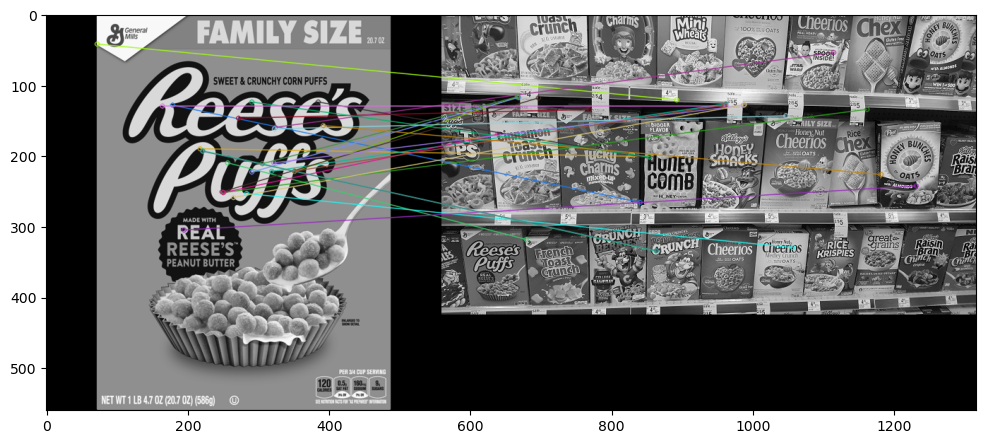

In [18]:
display(reeses_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [15]:
# Tạo đối tượng SIFT
sift = cv2.xfeatures2d.SIFT_create()

# Tìm các điểm đặc trưng và vectơ mô tả với SIFT cho ảnh reeses
kp1, des1 = sift.detectAndCompute(reeses, None)

# Tìm các điểm đặc trưng và vectơ mô tả với SIFT cho ảnh cereals
kp2, des2 = sift.detectAndCompute(cereals, None)

# BFMatcher với các tham số mặc định
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Áp dụng kiểm tra tỷ lệ
good = []
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn mong đợi danh sách các danh sách làm kết quả so khớp.
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

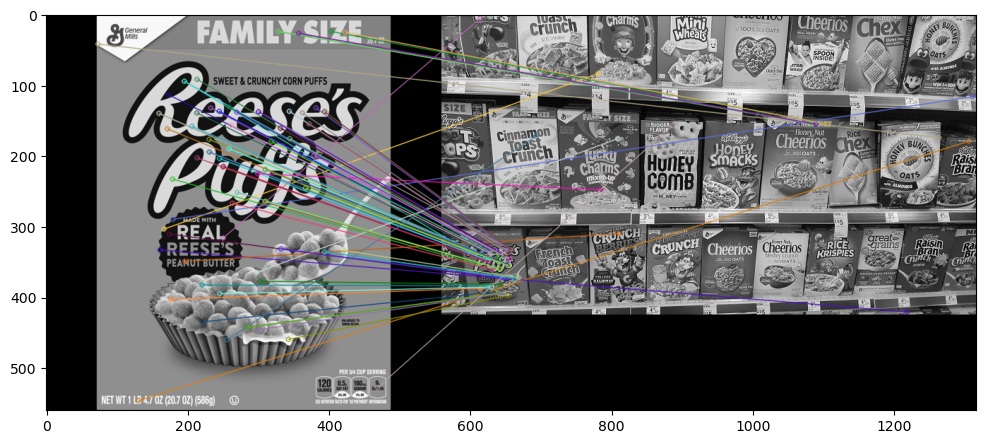

In [16]:
display(sift_matches)

# FLANN based Matcher

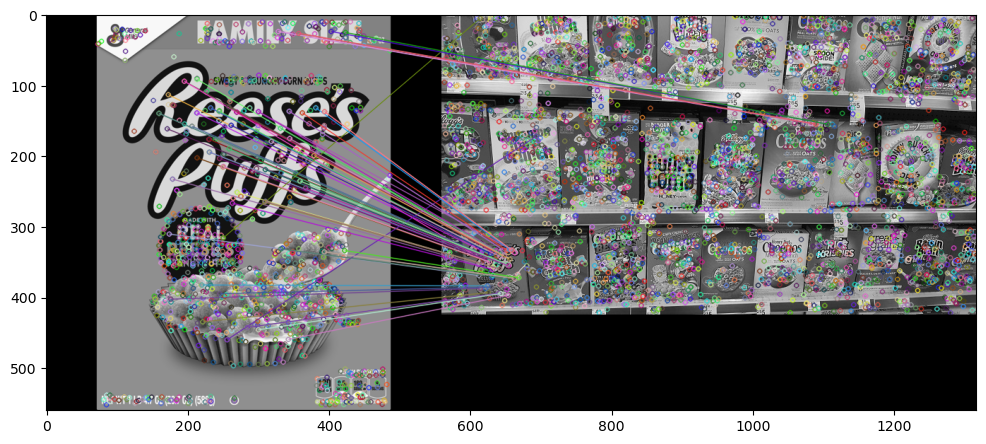

In [31]:
# Khởi tạo bộ xác định SIFT
sift = cv2.xfeatures2d.SIFT_create()

# Tìm các điểm đặc trưng và vectơ mô tả bằng SIFT
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

# Tham số FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Tạo đối tượng FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# So khớp các vectơ mô tả
matches = flann.knnMatch(des1, des2, k=2)

# Danh sách các so khớp đáng tin cậy
good = []

# Kiểm tra tỷ lệ
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])

# Vẽ các so khớp sử dụng FLANN
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)

# Hiển thị kết quả
display(flann_matches)

In [32]:
# Khởi tạo bộ xác định SIFT
sift = cv2.xfeatures2d.SIFT_create()

# Tìm các điểm đặc trưng và vectơ mô tả bằng SIFT cho ảnh reeses
kp1, des1 = sift.detectAndCompute(reeses, None)
# Tìm các điểm đặc trưng và vectơ mô tả bằng SIFT cho ảnh cereals
kp2, des2 = sift.detectAndCompute(cereals, None)

# Các tham số FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Tạo đối tượng FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# So khớp các vectơ mô tả
matches = flann.knnMatch(des1, des2, k=2)

# Cần vẽ chỉ các so khớp tốt, nên tạo một mặt nạ (mask)
matchesMask = [[0, 0] for i in range(len(matches))]

# Kiểm tra tỷ lệ
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i] = [1, 0]

# Tham số cho việc vẽ các so khớp
draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

# Vẽ các so khớp sử dụng FLANN
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

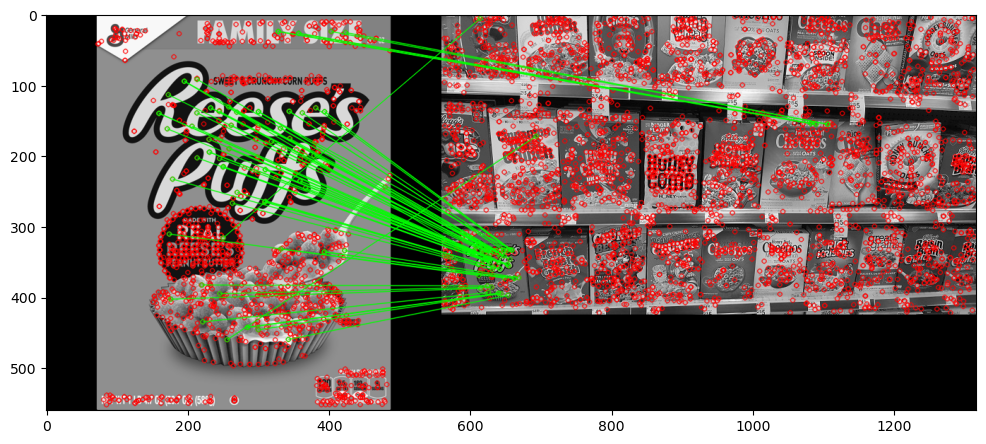

In [33]:
display(flann_matches)